In [50]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

pd.set_option('display.max_columns', None)
def user_name(link):
    driver = webdriver.Chrome()
    url = link
    driver.get(url)
    time.sleep(2)
    html_1 = driver.page_source 
    soup_1 = BeautifulSoup(html_1, 'html.parser')
    # mytable = soup_1.find(id="section_warp")
    mytable = soup_1.find('div', class_='table_type01 transverse_scroll cbox')
    col= [
        "Rank", "Name", 'Team', "War", "G", "PA", "effective PA", "AB", "R", "H", "2B", "3B", "HR",
        "TB", "RBI", "SB", "CS", "BB", "HP", "IB", "SO", "GDP", "SH", "SF",
        "AVG", "OBP", "SLG", "OPS", "R/ePA", "wRC+", "WAR"
    ]
    data_total=[]
    for row in mytable.find_all('tr'):    
        data=[]
        for contents in row.find_all('td'):
            data.append(contents.text)
        if len(data) != 0 :
            data_total.append(data)
    df=pd.DataFrame(data_total, columns=col)

    a_tags = driver.find_elements(By.TAG_NAME, 'a')
    name_link=[]
    for tag in a_tags : 
        middle=tag.get_attribute('href')
        if 'player/?m=playerinfo&' in middle:
            name_link.append(middle)

    return list(set(name_link))

In [51]:
highschool = user_name('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=&ob=&year=2024&sy=2010&ey=2023&te=&po=&lt=10100&reg=C100&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=18&ae=30&pl=&gc=&lr=&pr=1000&ph=&hs=50000&us=&na=1&ls=1&sf1=G&sk1=&sv1=&sf2=G&sk2=&sv2=-25')
university = user_name('https://statiz.sporki.com/stats/?m=main&m2=batting&m3=default&so=&ob=&year=2024&sy=2010&ey=2023&te=&po=&lt=10100&reg=C100&pe=&ds=&de=&we=&hr=&ha=&ct=&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=18&ae=30&pl=&gc=&lr=&pr=1000&ph=&hs=&us=60000&na=1&ls=1&sf1=G&sk1=&sv1=&sf2=G&sk2=&sv2=-25')

In [52]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [53]:
import warnings
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
def regr(total_player, grade):
    driver = webdriver.Chrome()
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for i in tqdm(total_player):
        driver.get(i)
        button_element = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[2]/div[2]/ul/li[2]/a')
        button_element.click()
        time.sleep(random.uniform(0.3, 1))
        bat = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[3]/div/div[1]/button[1]')
        bat.click()
        time.sleep(random.uniform(0.3, 1))
        html = driver.page_source 
        soup = BeautifulSoup(html, 'html.parser')
        # mytable = soup_1.find(id="section_warp")
        mytable = soup.find('div', class_='container')
        col= [
        "Year", 'Team', "Age", "Pos", "G", "PA", "effective PA", "AB", "R", "H", "2B", "3B", "HR",
        "TB", "RBI", "SB", "CS", "BB", "HP", "IB", "SO", "GDP", "SH", "SF",
        "AVG", "OBP", "SLG", "OPS", "R/ePA", "wRC+", "WAR"
        ]
        data_total = []
        for row in mytable.find_all('tr'):    
            data=[]
            for contents in row.find_all('td'):
                data.append(contents.text)
            if len(data) != 0 :
                data_total.append(data)
        df = pd.DataFrame(data_total, columns=col)
        name_element = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[2]/div[1]/div/div[2]/div[1]')
        name = name_element.text
        for idx, i in enumerate(df['PA'].values):
            if int(i) >= 100:
                x = df.iloc[idx:idx+1, :]
                x['Name'] = name
                x['Graduate'] = grade
                y = df.iloc[idx+1:idx+2, :]
                y['Name'] = name
                y['Graduate'] = grade
                if y['Team'].values[0] == '통산':
                    break
                X_train = pd.concat([X_train, x], ignore_index=True)
                y_train = pd.concat([y_train, y], ignore_index=True)
                break
    return X_train, y_train

In [54]:
#20분 정도 걸림
X_train_highschool, y_train_highschool = regr(highschool, '고졸')
X_train_university, y_train_university = regr(university, '대졸')

100%|██████████| 139/139 [05:32<00:00,  2.39s/it]


In [75]:
X_train = pd.concat([X_train_highschool, X_train_university], ignore_index=True)
y_train = pd.concat([y_train_highschool, y_train_university], ignore_index=True)

In [77]:
y_train=y_train[~X_train['Age'].isin(['RF', 'LF', 'C'])]
X_train=X_train[~X_train['Age'].isin(['RF', 'LF', 'C'])]
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
#투수쪽
"""
import random

def Pitcher(total_player, grade):
    driver = webdriver.Chrome()
    X_train = pd.DataFrame()
    y_train = pd.DataFrame()
    for rink in tqdm(total_player):
        driver.get(rink)
        button_element = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[2]/div[2]/ul/li[2]/a')
        button_element.click()
        time.sleep(random.uniform(0.3, 1))
        ball = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[3]/div/div[1]/button[2]')
        ball.click()
        time.sleep(random.uniform(0.3, 1))
        html = driver.page_source 
        soup = BeautifulSoup(html, 'html.parser')
        # mytable = soup_1.find(id="section_warp")
        mytable = soup.find('div', class_='container')
        col= ['Year', 'Team', 'Age', 'Pos', 'G', 'GS', 'GR', 'GF', 'W', 'L', 'S', 'HD', 'IP', 'ER', 'R', 'rRA', 
              'TBF', 'H', '2B', '3B', 'HR', 'BB', 'HP', 'IB', 'SO', 'ROE', 'BK', 'WP', 'ERA', 'RA9', 'rRA9', 'FIP', 'WHIP', 'WAR']
        data_total = []
        for row in mytable.find_all('tr'):    
            data=[]
            for contents in row.find_all('td'):
                data.append(contents.text)
            if len(data) != 0 :
                data_total.append(data)
        df = pd.DataFrame(data_total, columns=col)

        bat = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[4]/ul/li[2]')
        bat.click()
        time.sleep(random.uniform(0.3, 1))

        column_list = ['Year', 'Team', 'Age', 'Pos', 'G', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%', 
                       'K-BB%', 'BABIP', 'LOB', 'ERA', 'RA9', 'rRA9', 'FIP', 'xFIP', 'kwERA', 'ERA-FIP', 'ERA-', 
                       'rRA9-', 'FIP-', 'AVG', 'OBP', 'SLG', 'OPS', 'NP', 'P/G', 'P/IP', 'P/PA']
        
        data_total_deep = []
        name_element = driver.find_element(By.XPATH, '/html/body/div[2]/div[3]/section/div[2]/div[1]/div/div[2]/div[1]')
        name = name_element.text

        html = driver.page_source 
        soup = BeautifulSoup(html, 'html.parser')
        mytable = soup.find('div', class_='container')
        for row in mytable.find_all('tr'):    
            data_deep=[]
            for contents in row.find_all('td'):
                data_deep.append(contents.text)
            if len(data_deep) != 0 :
                data_total_deep.append(data_deep)

        df_deep = pd.DataFrame(data_total_deep, columns=column_list)
        
        df_deep=df_deep[list(set(column_list)-set(col))]
        
        df = pd.concat([df, df_deep], axis=1)
        
        for idx, i in enumerate(df['IP'].values):
            if float(i) >= 30:
                x = df.iloc[idx:idx+1, :]
                x['Name'] = name
                x['Graduate'] = grade
                x['rink'] = rink
                y = df.iloc[idx+1:idx+2, :]
                y['Name'] = name
                y['Graduate'] = grade
                try :
                    if y['Team'].values[0] == '통산':
                        break
                except :
                    print(name)
                    print(df)
                    break
                X_train = pd.concat([X_train, x], ignore_index=True)
                y_train = pd.concat([y_train, y], ignore_index=True)
                break
    return X_train, y_train
    
X_train_pit_highschool, y_train_pit_highschool = Pitcher(highschool_pitcher, '고졸')
X_train_pit_university, y_train_pit_university = Pitcher(university_pitcher, '대졸')
"""

In [82]:
import pandas as pd
import re


# 정규 표현식을 사용하여 한글만 남기기
X_train['Name'] = X_train['Name'].apply(lambda x: ''.join(re.findall('[ㄱ-ㅎㅏ-ㅣ가-힣]+', x)))
y_train['Name'] = y_train['Name'].apply(lambda x: ''.join(re.findall('[ㄱ-ㅎㅏ-ㅣ가-힣]+', x)))

    Rank Name    Team    War    G   PA effective PA   AB    R    H  2B  3B  \
0      1  이정후  22  CF   8.89  142  627          618  553   85  193  36  10   
1      2  박병호  15  1B   8.53  140  622          617  528  129  181  35   1   
2      3  강정호  12  SS   8.31  124  519          510  436   77  137  32   0   
3      4  김하성  20  SS   8.10  138  622          617  533  111  163  24   1   
4      5  오지환  19  SS   7.73  134  547          539  473   63  119  23   5   
..   ...  ...     ...    ...  ...  ...          ...  ...  ...  ...  ..  ..   
621  622  김문호  14  LF  -1.91   71  222          216  192   28   41  11   3   
622  623  유강남   15  C  -1.99  126  313          306  279   26   76  11   1   
623  624  하준호  17  LF  -2.02  101  226          222  196   31   44  11   1   
624  625  백용환   16  C  -2.20   80  199          195  174   12   34   7   0   
625  626  한동희  23  3B  -2.48  108  353          351  319   30   71  11   0   

     HR   TB  RBI  SB CS  BB  HP  IB   SO GDP SH SF    AVG    O

In [84]:
X_train.to_csv('x_data.csv',index=False)
y_train.to_csv('y_data.csv',index=False)

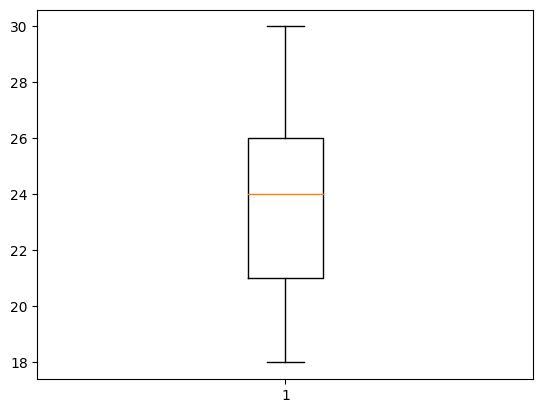

In [80]:
#나이가 많은 중고 신인 존재
X_train['Age']=X_train['Age'].astype('float')
import matplotlib.pyplot as plt
plt.boxplot(X_train['Age'].values)
plt.show()

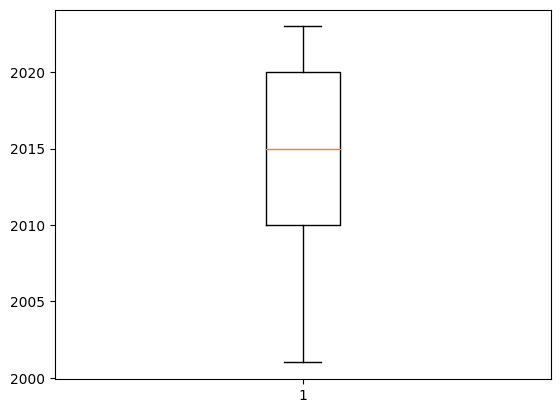

In [ ]:
X_train['Year']=X_train['Year'].astype('float')
import matplotlib.pyplot as plt
plt.boxplot(X_train['Year'].values)
plt.show()

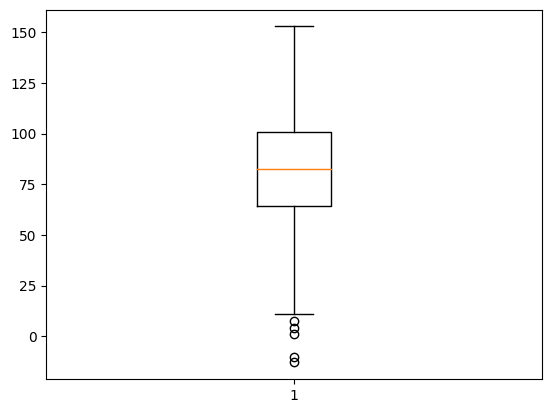

In [248]:
X_train['wRC+']=X_train['wRC+'].astype('float')
import matplotlib.pyplot as plt
plt.boxplot(X_train['wRC+'].values)
plt.show()

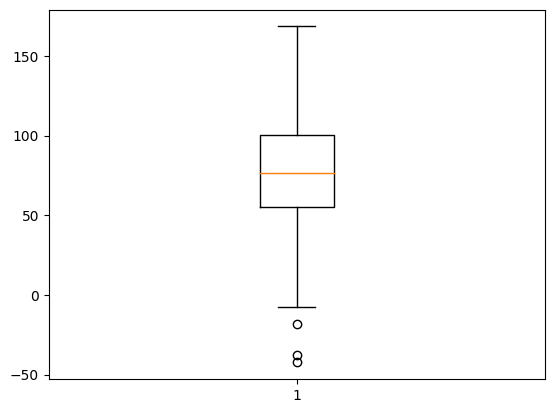

In [249]:
y_train['wRC+']=y_train['wRC+'].astype('float')
import matplotlib.pyplot as plt
plt.boxplot(y_train['wRC+'].values)
plt.show()

In [187]:
y_train['PA']=y_train['PA'].astype('float')

In [191]:
#데뷔년도는 100타석 다음 년도는 50타석 이상만 사용
X_train=X_train[y_train['PA']>50]
y_train=y_train[y_train['PA']>50]

In [209]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

In [229]:
x_data=X_train[['Pos','Age','PA','H','2B','HR','OBP','SLG','wRC+','WAR']]
y_data=y_train[['OPS','wRC+']]

In [233]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_data['Pos'] = label_encoder.fit_transform(x_data['Pos'])
x_data=x_data.astype('float')
y_data=y_data.astype('float')

In [240]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)


In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, train_y)
y_pred = rf_regressor.predict(X_test_scaled)
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 533.5179611976023


In [245]:
test_y.reset_index(drop=True)

,OPS,wRC+
0,0.589,50.2
1,0.803,114.6
2,0.790,113.4
3,0.492,15.8
4,0.650,73.3
5,0.523,30.0
6,0.752,98.1
7,1.002,137.7
8,0.657,90.7
9,0.474,9.5


In [246]:
pd.DataFrame(y_pred)

,0,1
0,0.69536,85.162
1,0.73729,99.766
2,0.68679,86.549
3,0.65516,73.699
4,0.69181,83.709
5,0.67551,80.719
6,0.68981,82.138
7,0.84321,129.585
8,0.64035,66.473
9,0.68514,84.540
